In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
path = '/Users/fbickfordsmith/Google Drive/Project/attention/training/'

In [6]:
plt.style.use('seaborn-bright')

In [199]:
def plot_training(type_context, version_weights, name):
    identifier = f'{type_context}_v{version_weights}'
    filenames = sorted([f for f in os.listdir(path) if identifier in f])
    if type_context == 'size':
        filenames = filenames[1:]
    num_contexts = len(filenames)
    
    num_cols = 3
    width_ratio = 10
    shape_fig = (int(np.ceil(num_contexts/num_cols)), num_cols)
    fig, ax = plt.subplots(
        *shape_fig,
#         sharex=True,
#         sharey=False,
        figsize=(4*num_cols, 0.8*num_contexts))
#         gridspec_kw={'width_ratios': [width_ratio for _ in range(num_cols)]})
    
    for i, filename in enumerate(filenames):
        df = pd.read_csv(path+filename, index_col=0)
        rowcol = np.unravel_index(i, shape_fig)
        ax[rowcol].plot(df['loss'], label='training')
        ax[rowcol].plot(df['val_loss'], '--', label='validation')
#         ax[rowcol].set_title(filename.split('_training')[0])
        ax[rowcol].set_title(f'{name} category set {i+1}')
        ax[rowcol].set_xlim((0, 300))
        ax[rowcol].set_xticks((0, 300))
        ylims = (
            round(min([df['loss'].min(), df['val_loss'].min()]), 1)-0.1,
            round(max([df['loss'].max(), df['val_loss'].max()]), 1)+0.1)
        ax[rowcol].set_ylim(ylims)
        ax[rowcol].set_yticks(ylims)
        ax[rowcol].legend()
#         if rowcol[1] == 0:
        ax[rowcol].set_ylabel('Loss', labelpad=-10)
#         if rowcol[0] == shape_fig[0]-1:
        ax[rowcol].set_xlabel('Epoch', labelpad=-10)
            
    for i in range(num_contexts, np.prod(shape_fig)):
        rowcol = np.unravel_index(i, shape_fig)
        ax[rowcol].set_visible(False)
            
    plt.tight_layout()
    plt.savefig(f'{identifier}_loss.pdf')
    return fig, ax

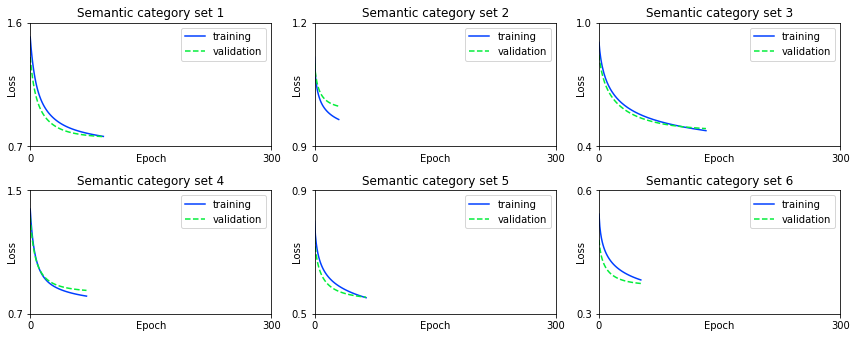

In [200]:
plot_training('sem', 9, 'Semantic');

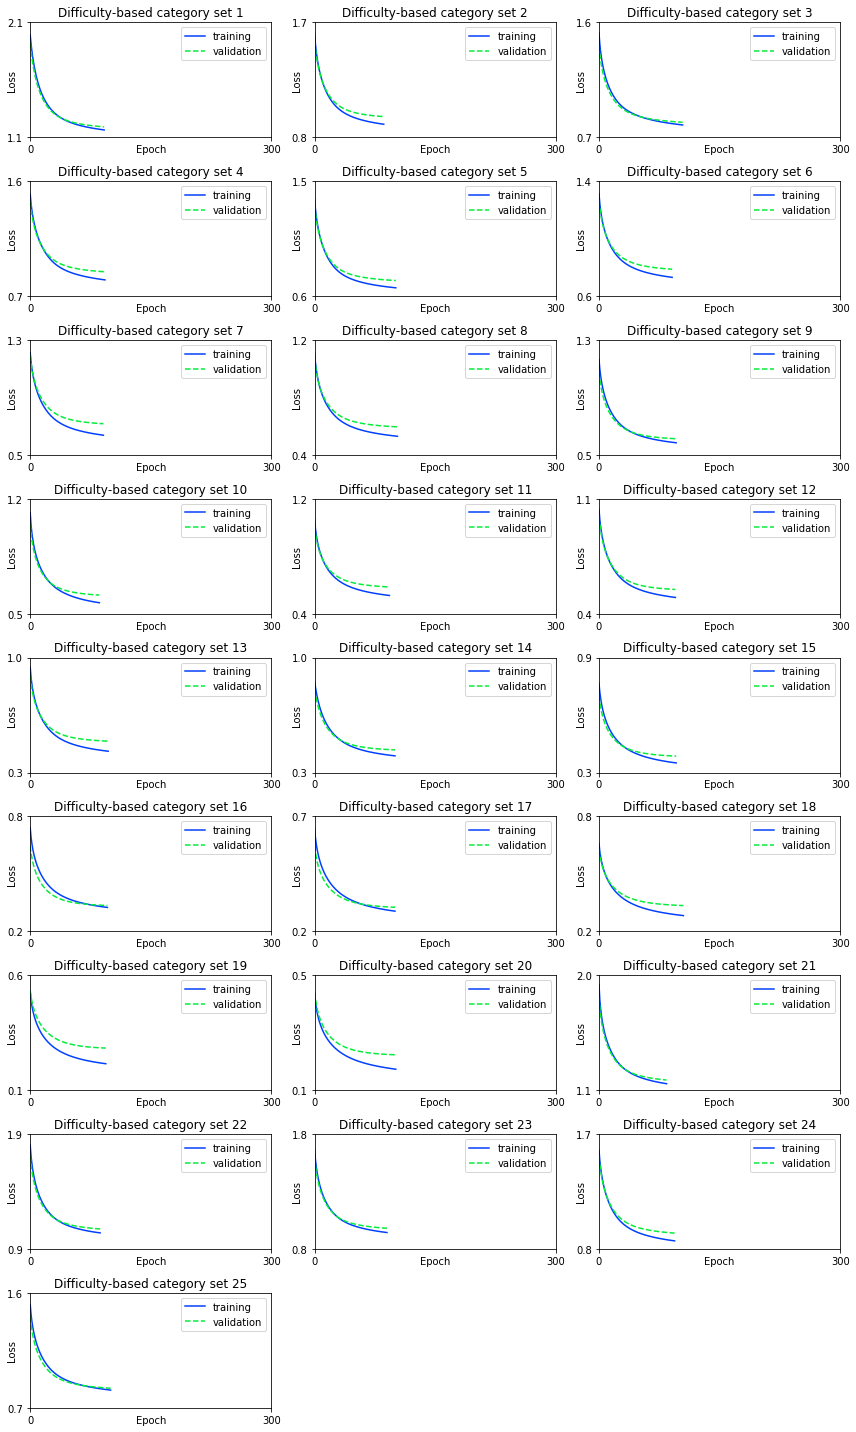

In [201]:
plot_training('diff', 3, 'Difficulty-based');

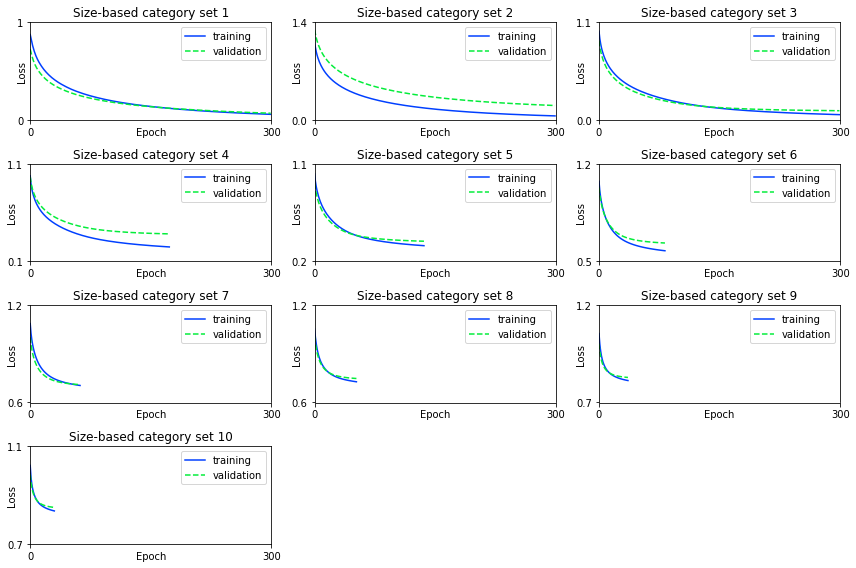

In [202]:
plot_training('size', 6, 'Size-based');

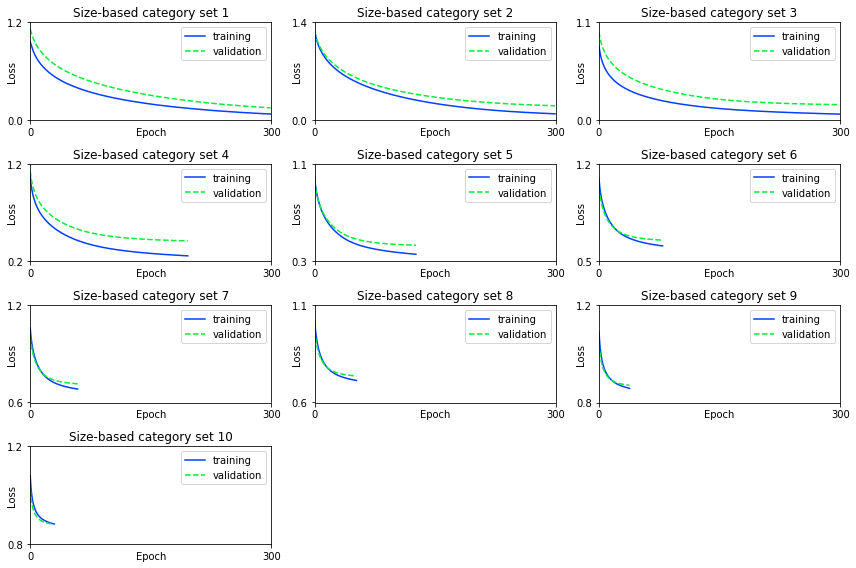

In [203]:
plot_training('size', 7, 'Size-based');

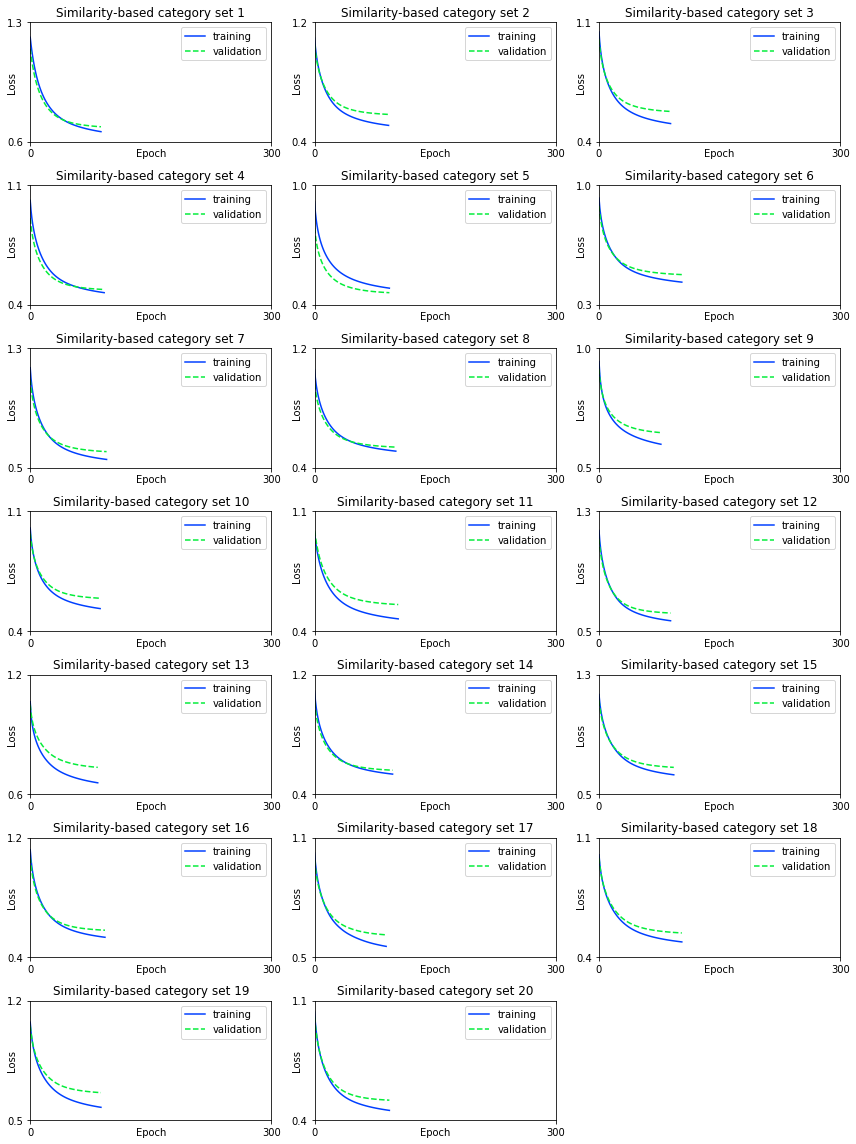

In [204]:
plot_training('sim', 3, 'Similarity-based');

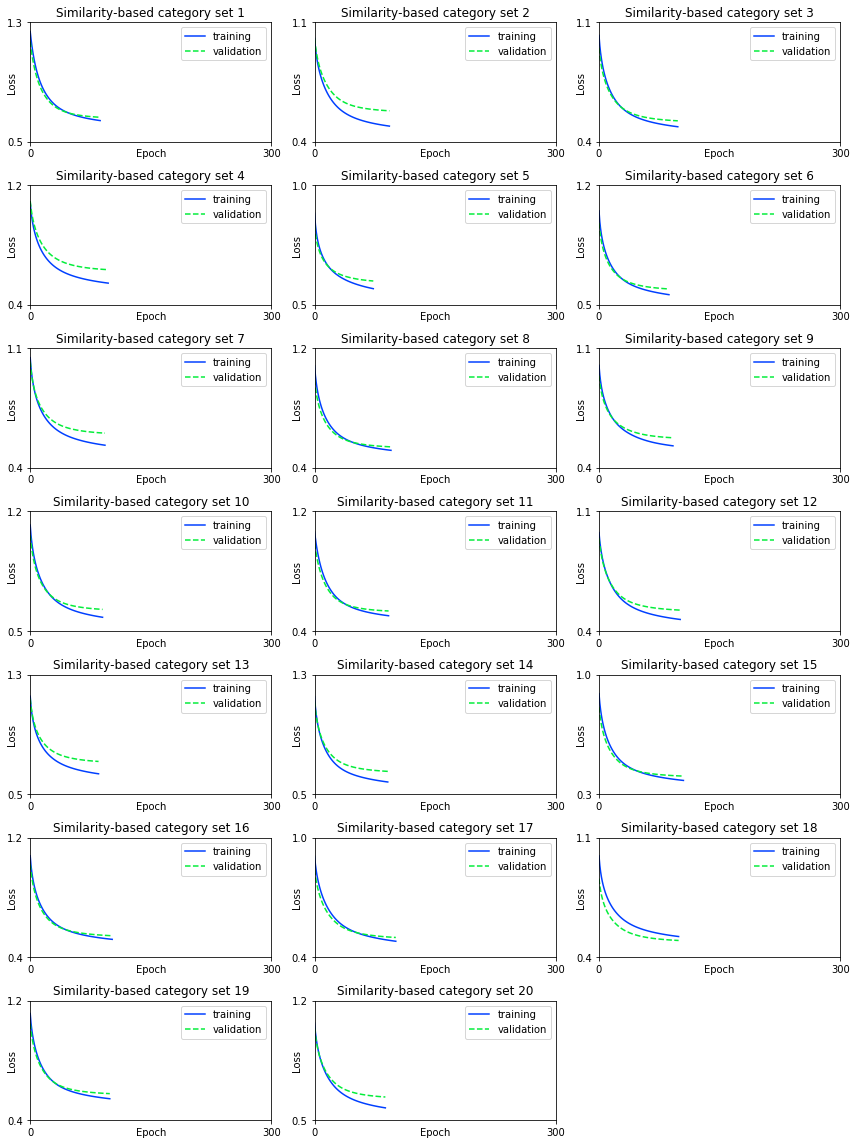

In [205]:
plot_training('sim', 4, 'Similarity-based');